# TIME SERIES DATA

you will learn how to manipulate and visualize time series data using pandas. You will become familiar with concepts such as upsampling, downsampling, and interpolation. You will practice using method chaining to efficiently filter your data and perform time series analyses

In [24]:
date_list = ['20100101 00:00', '20100101 01:00', '20100102 00:00', '20100102 01:00',
             '20100103 00:00', '20100104 00:00', '20100105 00:00']

temperature_list = [46.2, 44.6, 44.1, 43.8, 43.5, 43.0, 43.1]

## Creating and using a DatetimeIndex
The pandas Index is a powerful way to handle time series data, so it is valuable to know how to build one yourself. Pandas provides the `pd.to_datetime()` function for just this task. For example, if passed the list of strings `['2015-01-01 091234','2015-01-01 091234']` and a format specification variable, such as `format='%Y-%m-%d %H%M%S`, pandas will parse the string into the proper datetime elements and build the datetime objects.

In [25]:
# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)
time_series

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-02 00:00:00    44.1
2010-01-02 01:00:00    43.8
2010-01-03 00:00:00    43.5
2010-01-04 00:00:00    43.0
2010-01-05 00:00:00    43.1
dtype: float64

## Partial string indexing and slicing
Pandas time series support "partial string" indexing. What this means is that even when passed only a portion of the datetime, such as the date but not the time, pandas is remarkably good at doing what one would expect. Pandas datetime indexing also supports a wide variety of commonly used datetime string formats, even when mixed.

In [26]:
# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = time_series.loc['2010-01-01 00:00:00':'2010-01-01 01:00:00']
print(ts1)

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
dtype: float64


In [27]:
# Extract '2010-07-04' from ts0: ts2
ts2 = time_series.loc['2010-01-02 00:00:00']
print(ts2)

44.1


In [28]:
# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = time_series.loc['2010-01-03':'2010-01-04']
print(ts3)

2010-01-03    43.5
2010-01-04    43.0
dtype: float64


## Reindexing the Index
Reindexing is useful in preparation for adding or otherwise combining two time series data sets. To reindex the data, we provide a new index and ask pandas to try and match the old data to the new index. If data is unavailable for one of the new index dates or times, you must tell pandas how to fill it in. Otherwise, pandas will fill with `NaN` by default.

In [29]:
new_date_list = ['20110101 00:00', '20110101 01:00', '20110102 00:00', '20110102 01:00',
                 '20110103 00:00', '20110104 00:00', '20110105 00:00']

new_my_datetimes = pd.to_datetime(new_date_list, format=time_format) 

time_series.index = new_my_datetimes
time_series

2011-01-01 00:00:00    46.2
2011-01-01 01:00:00    44.6
2011-01-02 00:00:00    44.1
2011-01-02 01:00:00    43.8
2011-01-03 00:00:00    43.5
2011-01-04 00:00:00    43.0
2011-01-05 00:00:00    43.1
dtype: float64

In [30]:
# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  

# Construct a pandas Series using temperature_list and my_datetimes: time_series
df = pd.DataFrame(temperature_list, index=my_datetimes, columns=['Temperature'])
df

,Temperature
2010-01-01 00:00:00,46.2
2010-01-01 01:00:00,44.6
2010-01-02 00:00:00,44.1
2010-01-02 01:00:00,43.8
2010-01-03 00:00:00,43.5
2010-01-04 00:00:00,43.0
2010-01-05 00:00:00,43.1


## Resampling and frequency
Pandas provides methods for resampling time series data. When downsampling or upsampling, the syntax is similar, but the methods called are different. Both use the concept of 'method chaining' - `df.method1().method2().method3()` - to direct the output from one method call to the input of the next, and so on, as a sequence of operations, one feeding into the next.

For example, if you have hourly data, and just need daily data, pandas will not guess how to throw out the 23 of 24 points. You must specify this in the method. One approach, for instance, could be to take the mean, as in `df.resample('D').mean()`.

In [31]:
# Downsample to 6 hour data and aggregate by mean: df1
df1 = df['Temperature'].resample('2h').mean()
print(df1)

2010-01-01 00:00:00    45.40
2010-01-01 02:00:00      NaN
2010-01-01 04:00:00      NaN
2010-01-01 06:00:00      NaN
2010-01-01 08:00:00      NaN
2010-01-01 10:00:00      NaN
2010-01-01 12:00:00      NaN
2010-01-01 14:00:00      NaN
2010-01-01 16:00:00      NaN
2010-01-01 18:00:00      NaN
2010-01-01 20:00:00      NaN
2010-01-01 22:00:00      NaN
2010-01-02 00:00:00    43.95
2010-01-02 02:00:00      NaN
2010-01-02 04:00:00      NaN
2010-01-02 06:00:00      NaN
2010-01-02 08:00:00      NaN
2010-01-02 10:00:00      NaN
2010-01-02 12:00:00      NaN
2010-01-02 14:00:00      NaN
2010-01-02 16:00:00      NaN
2010-01-02 18:00:00      NaN
2010-01-02 20:00:00      NaN
2010-01-02 22:00:00      NaN
2010-01-03 00:00:00    43.50
2010-01-03 02:00:00      NaN
2010-01-03 04:00:00      NaN
2010-01-03 06:00:00      NaN
2010-01-03 08:00:00      NaN
2010-01-03 10:00:00      NaN
2010-01-03 12:00:00      NaN
2010-01-03 14:00:00      NaN
2010-01-03 16:00:00      NaN
2010-01-03 18:00:00      NaN
2010-01-03 20:

In [32]:
# Downsample to daily data and count the number of data points: df2
df2 = df['Temperature'].resample('D').count()
print(df2)

2010-01-01    2
2010-01-02    2
2010-01-03    1
2010-01-04    1
2010-01-05    1
Freq: D, Name: Temperature, dtype: int64


In [33]:
daily_highs = df['Temperature'].resample('H').max()
daily_highs

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00     NaN
2010-01-01 03:00:00     NaN
2010-01-01 04:00:00     NaN
                       ... 
2010-01-04 20:00:00     NaN
2010-01-04 21:00:00     NaN
2010-01-04 22:00:00     NaN
2010-01-04 23:00:00     NaN
2010-01-05 00:00:00    43.1
Freq: H, Name: Temperature, Length: 97, dtype: float64

## Rolling mean and frequency
In this exercise, some hourly weather data is pre-loaded for you. You will continue to practice resampling, this time using rolling means.

Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends. You can read more about them here.

To use the `.rolling()` method, you must always use method chaining, first calling `.rolling()` and then chaining an aggregation method after it. For example, with a Series hourly_data, `hourly_data.rolling(window=24).mean()` would compute new values for each hourly point, based on a 24-hour window stretching out behind each point. The frequency of the output data is the same: it is still hourly. Such an operation is useful for smoothing time series data.

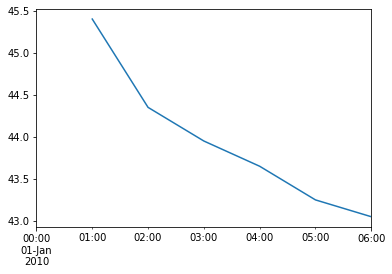

In [170]:
# Apply a rolling mean with a 24 hour window: smoothed
smoothed = df['Temperature'].rolling(2).mean().plot()